In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [2]:
if not os.path.exists("../figures/compare/"):
    os.makedirs("../figures/compare/")

In [3]:
subjects = [
    "Computer Science",
    "Epidemiology",
    "Engineering",
    "Mathematics",
    "Natural Science",
    "Medicine",
    "Other",
    "Physics",
    "Chemistry",
    "Public Health",
]
subject_ids = [s.replace(" ", "-").lower() for s in subjects]

In [4]:
result_types = ["main", "chaos", "preprint"] + subject_ids

In [5]:
result_type_names = {
    "main": "All Papers",
    "chaos": "Chaos, Solitons & Fractals",
    "preprint": "Preprints",
}
for s in subjects:
    result_type_names[s.replace(" ", "-").lower()] = f"{s} Journals"

In [6]:
results = {k: pd.read_excel(f"../results/results-{k}.xlsx", sheet_name=None, engine="openpyxl") for k in result_types}

In [7]:
for k in result_types:
    results[k]["method_cats"].value = results[k]["method_cats"].value.map(lambda x: x.title())
    results[k]["method_cats"].sort_values(by="value", inplace=True)

In [8]:
cmap_methods = {v: px.colors.qualitative.Plotly[i] for i, v in enumerate(results["main"]["method_cats"].value)}

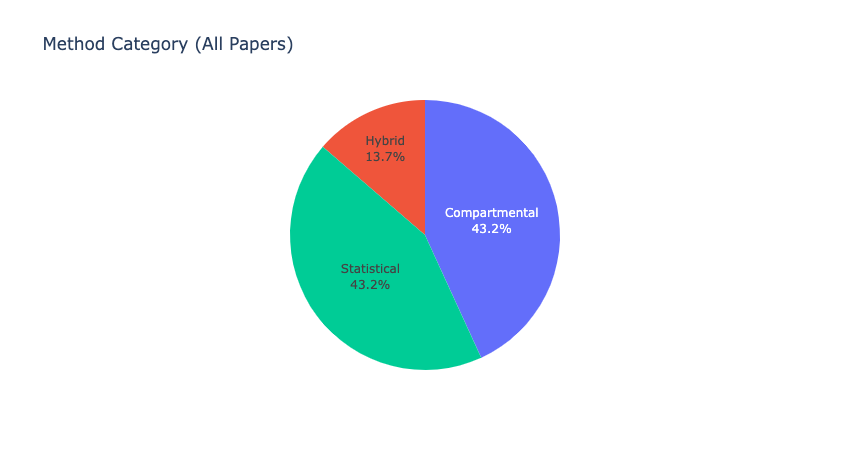

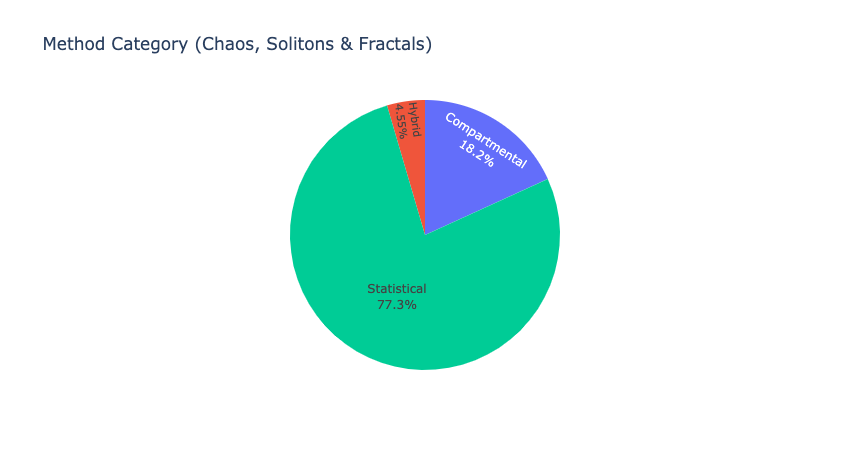

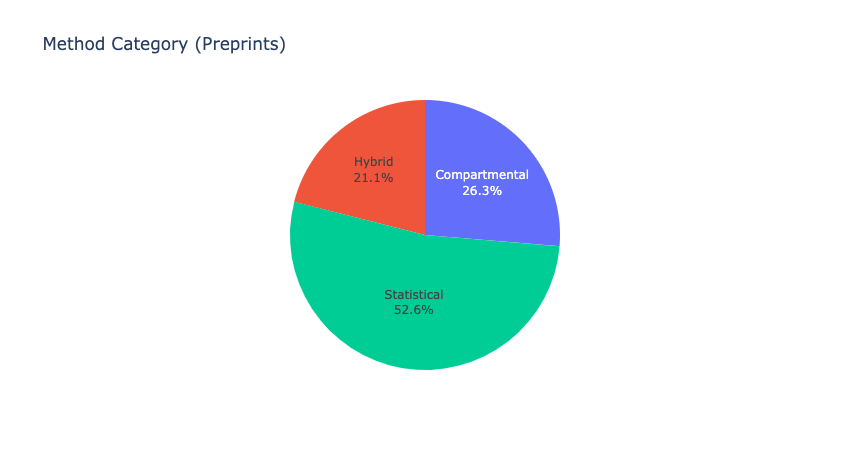

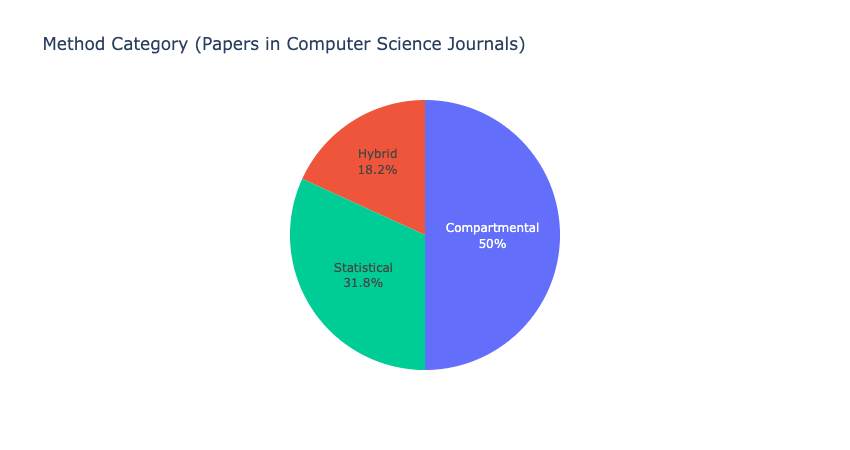

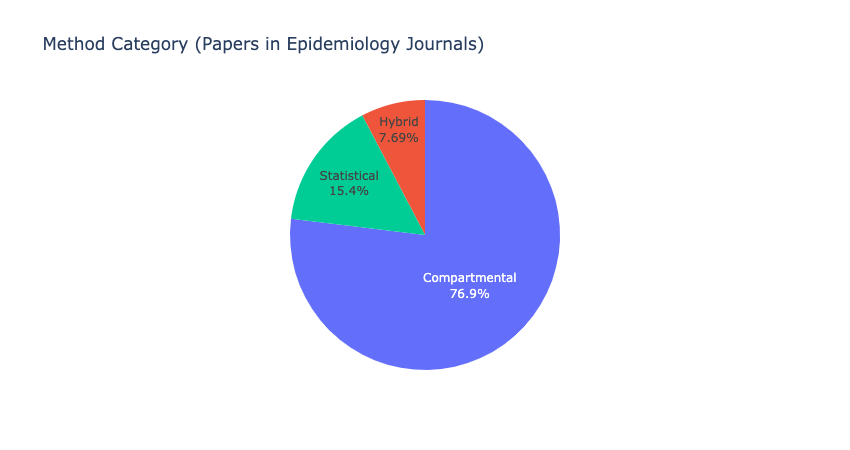

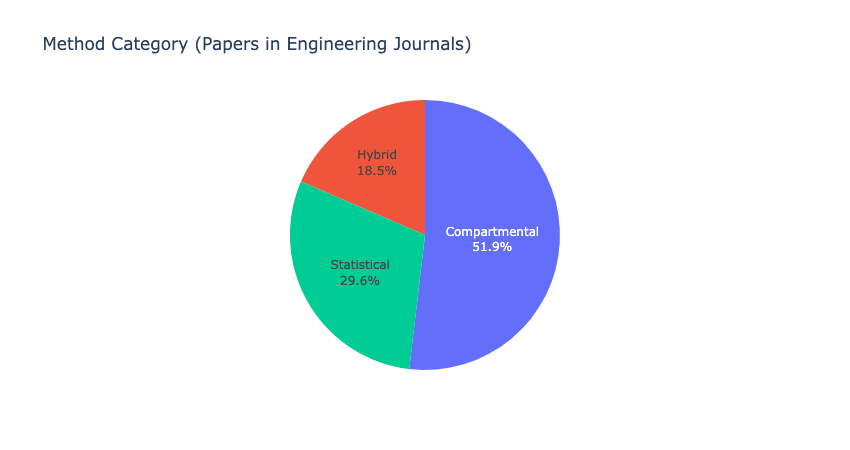

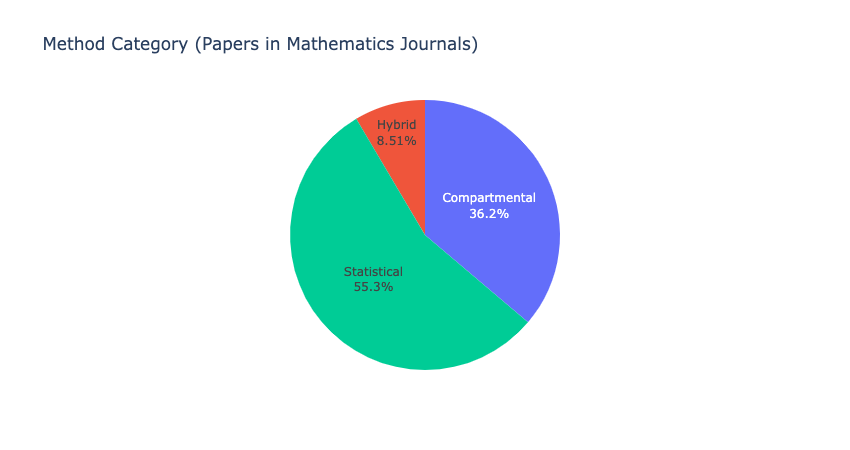

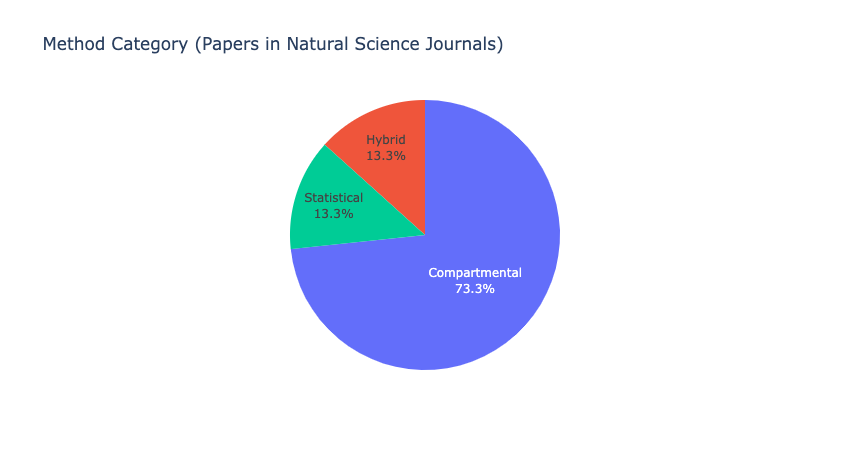

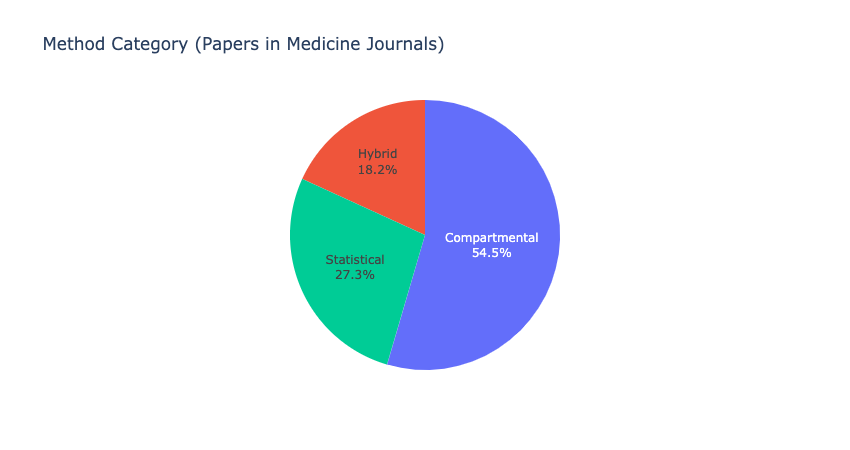

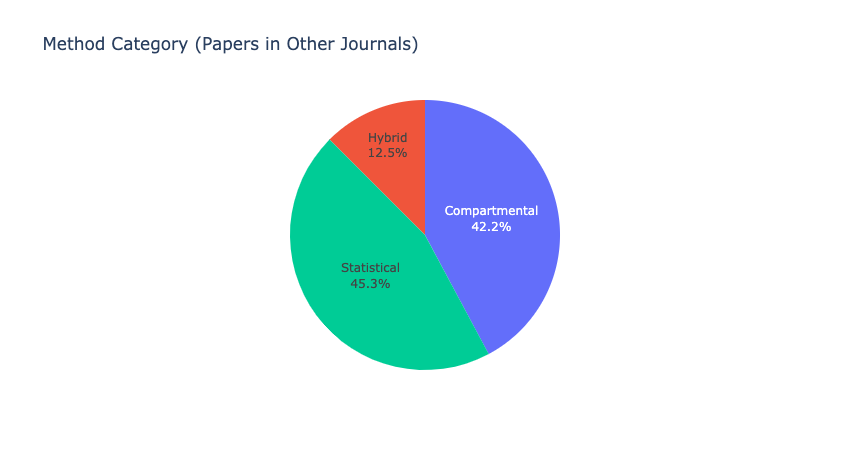

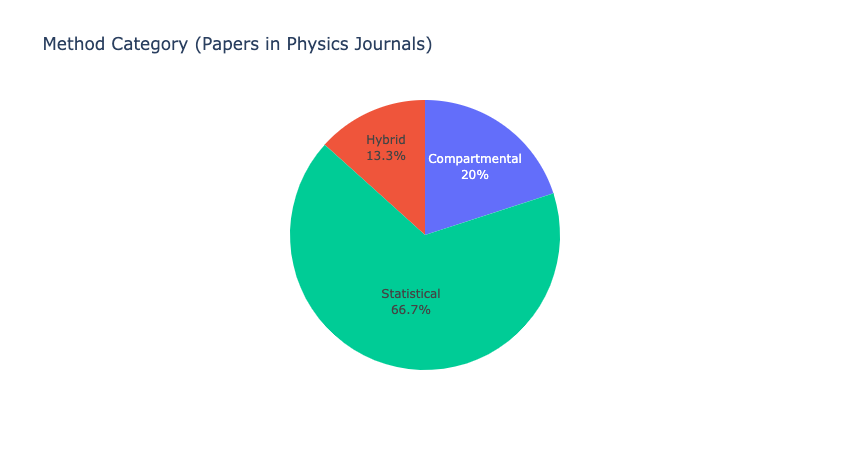

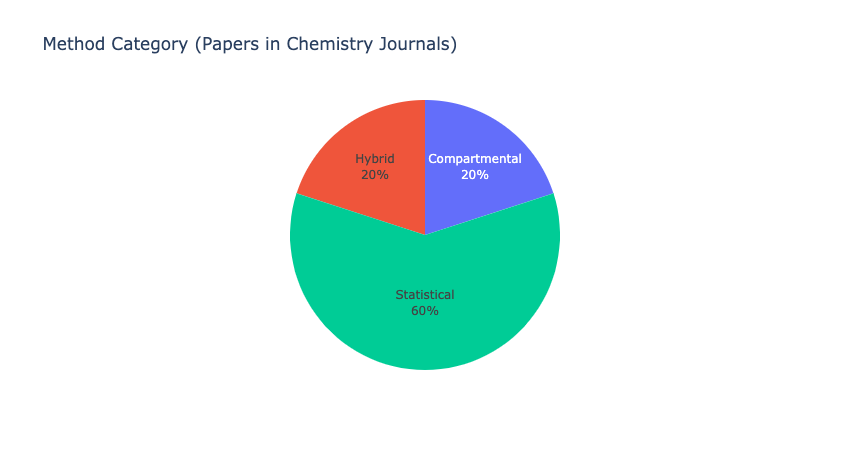

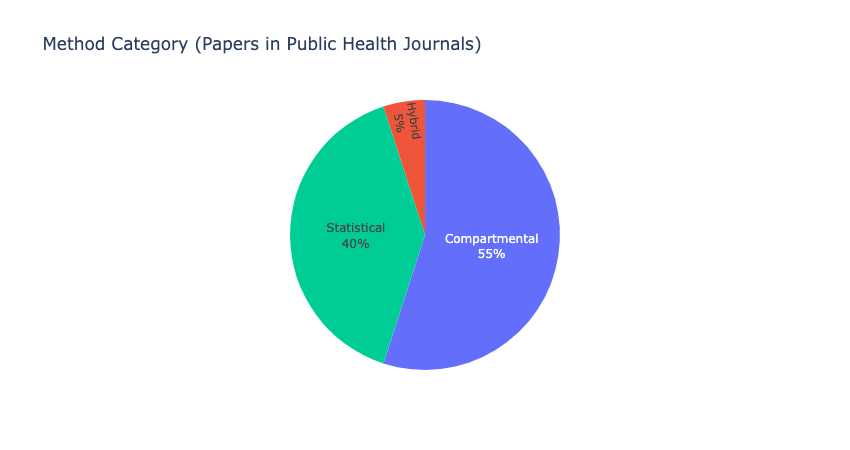

In [9]:
for k in result_types:
    p = "Papers in " if k in subject_ids else ""
    fig = px.pie(results[k]["method_cats"], values="pct", names="value", color="value", title=f"Method Category ({p}{result_type_names[k]})", color_discrete_map=cmap_methods)
    fig.update_traces(textposition="inside", textinfo="percent+label", sort=False)
    fig.update_layout(showlegend=False)
    fig.write_image(f"../figures/compare/methods_{k}.png")
    fig.show()

In [10]:
results_data = {k: results[k]["data_cats"].copy() for k in result_types}

In [11]:
selected_datatypes = ["cases", "climate", "deaths", "demographics", "hospitalizations", "mobility", "testing", "vaccination", "other"]

In [12]:
cmap_raw = px.colors.qualitative.Plotly
cmap_data = {v.title(): cmap_raw[i % len(cmap_raw)] for i, v in enumerate(selected_datatypes)}

In [13]:
for k in result_types:
    if "other" in selected_datatypes:
        results_data[k].value = results_data[k].value.map(lambda v: v if v in selected_datatypes else "other")
    else:
        results_data[k] = results_data[k][results_data[k].value.isin(selected_datatypes)]
    for z in selected_datatypes:
        if z not in results_data[k].value.tolist():
            results_data[k] = results_data[k].append({"value": z, "occurances": 0, "pct": 0}, ignore_index=True)
    results_data[k] = results_data[k].groupby("value", as_index=False).sum()
    results_data[k].value = results_data[k].value.map(lambda x: x.title())
    results_data[k].pct = results_data[k].pct.map(lambda x: x * 100)
    results_data[k].sort_values(by="value", inplace=True)

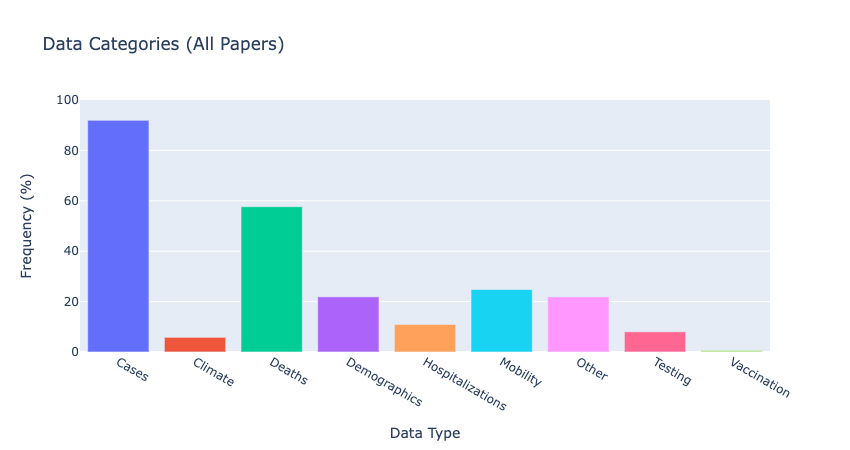

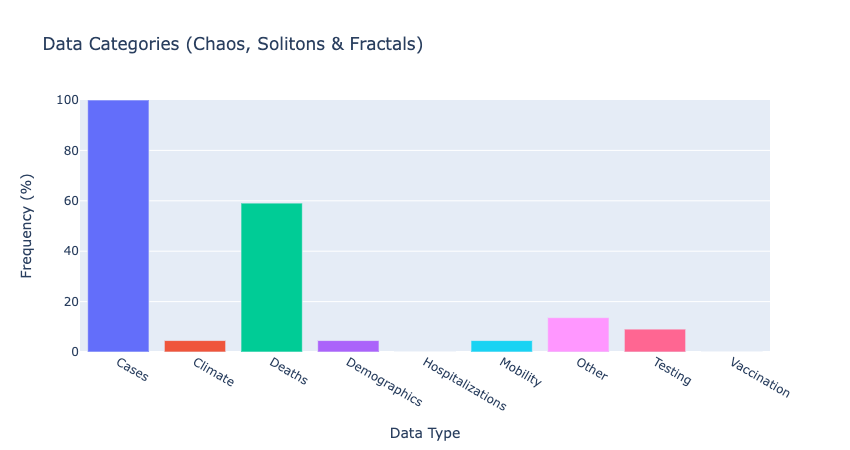

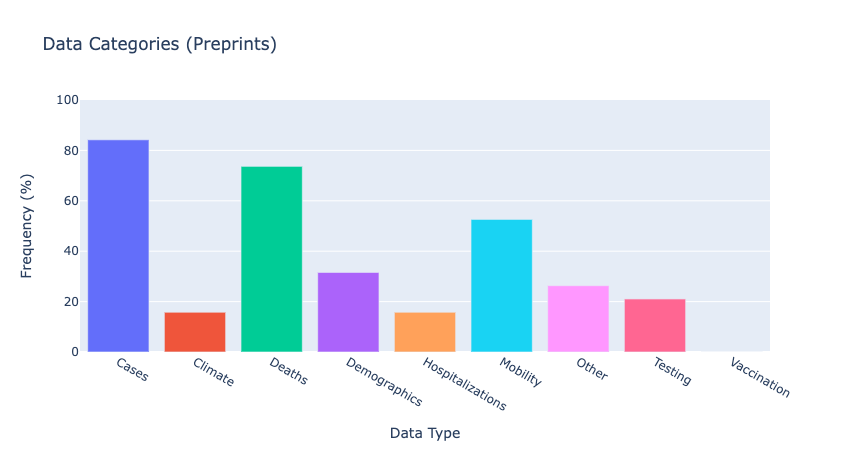

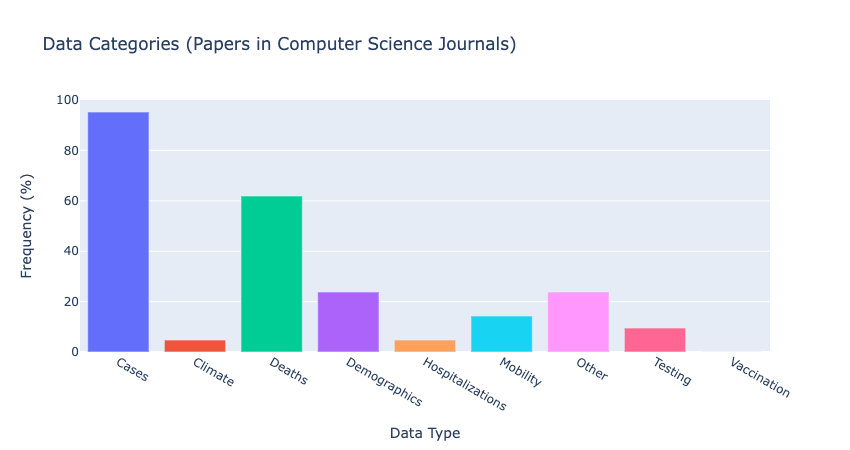

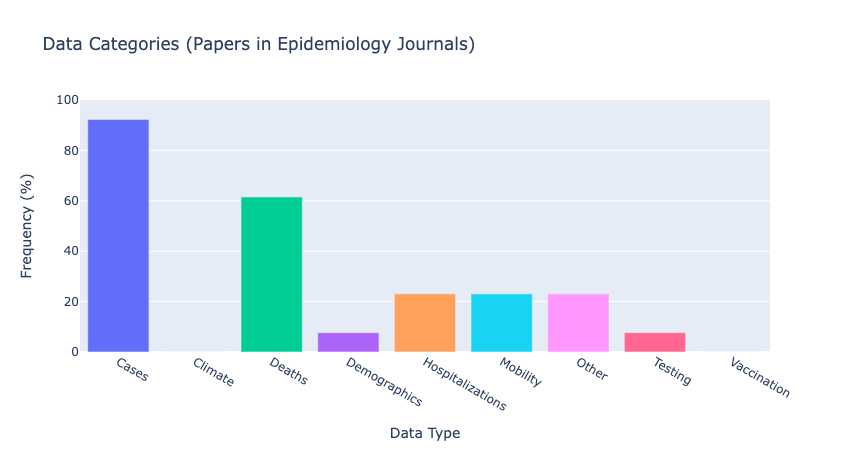

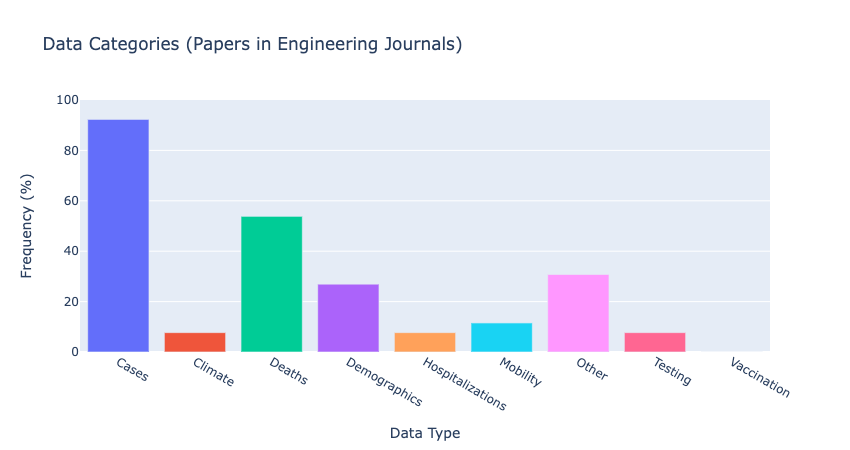

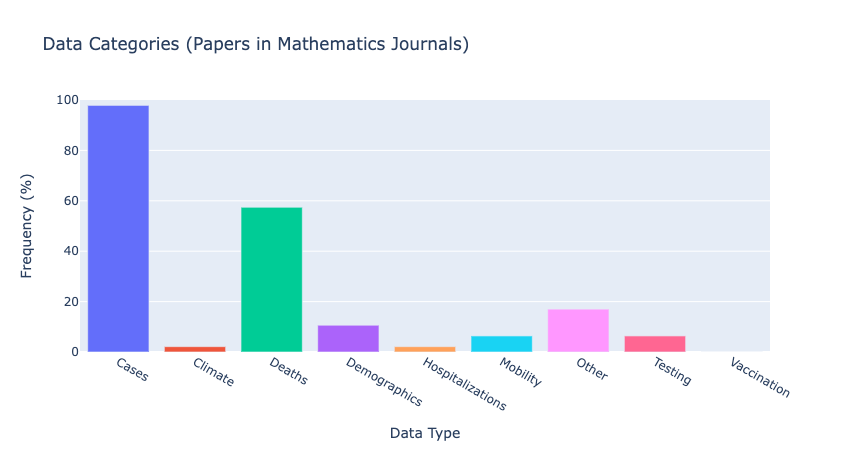

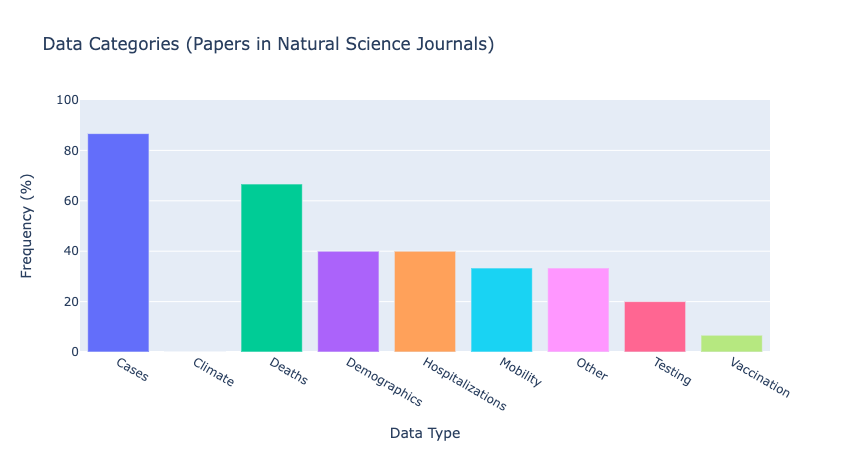

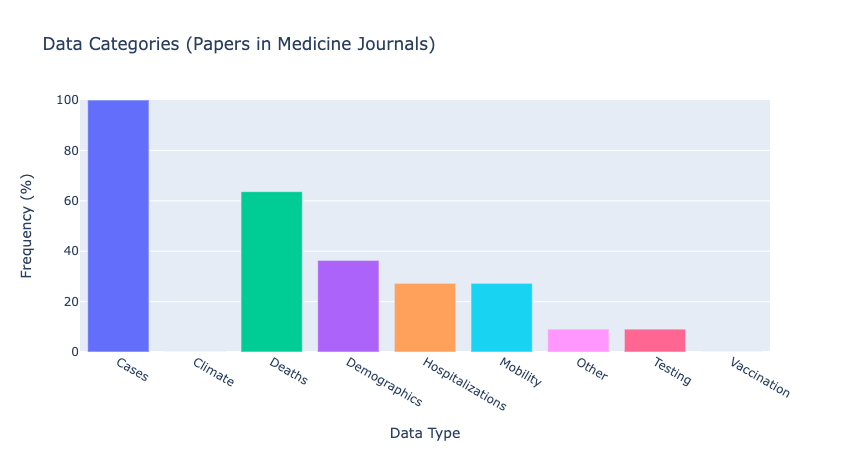

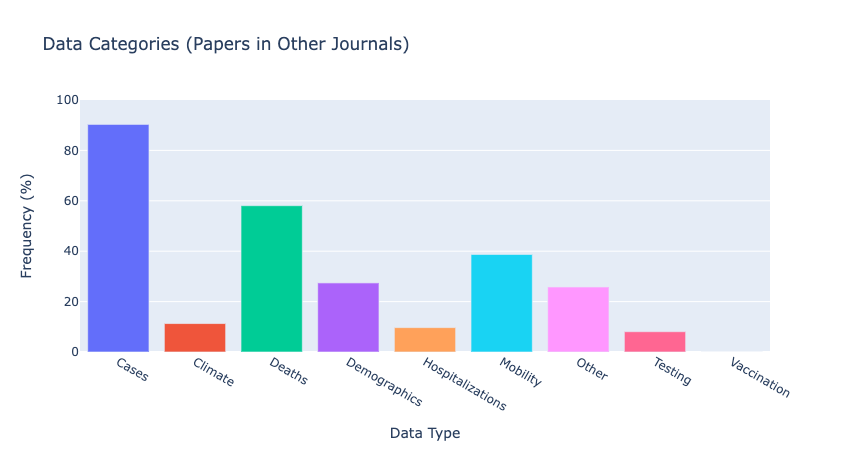

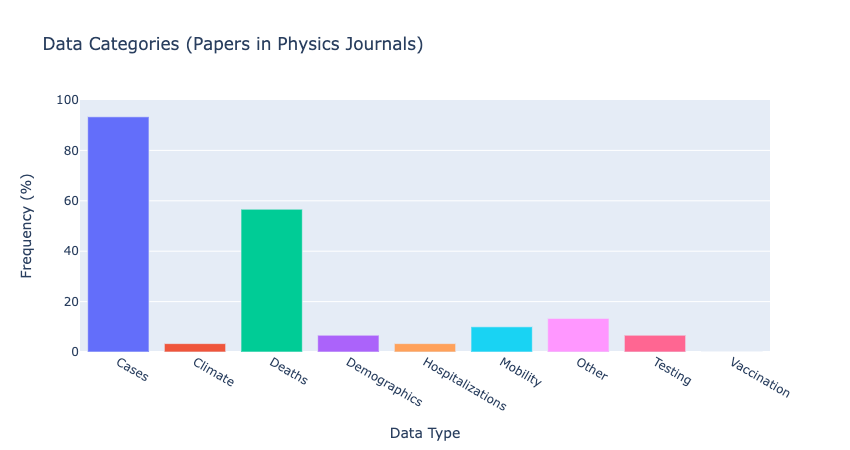

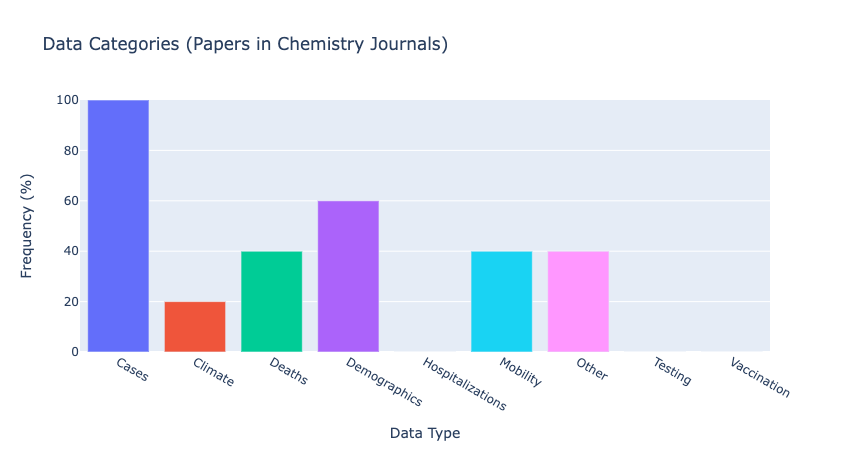

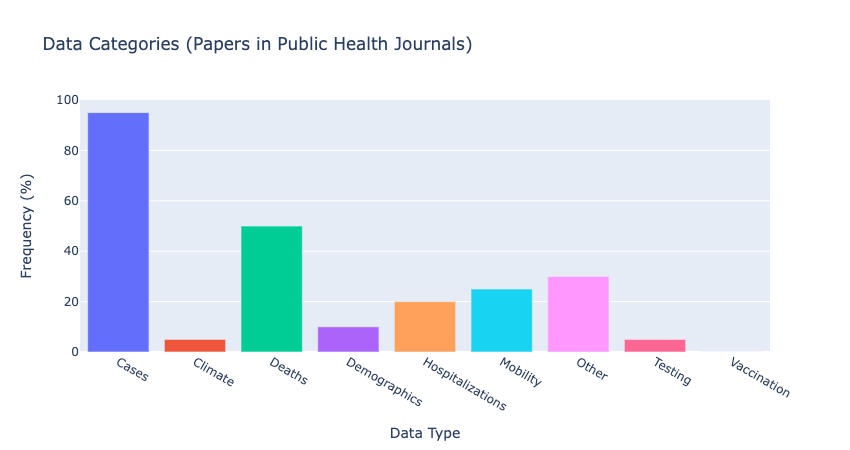

In [14]:
for k in result_types:
    p = "Papers in " if k in subject_ids else ""
    fig = px.bar(
        results_data[k],
        y="pct", x="value", color="value",
        title=f"Data Categories ({p}{result_type_names[k]})",
        color_discrete_map=cmap_data,
        range_y=(0,100),
        labels={"pct": "Frequency (%)", "value": "Data Type"},
    )
    fig.update_layout(showlegend=False)
    fig.write_image(f"../figures/compare/data_{k}.png")
    fig.show()

In [15]:
results_methods_small = results["main"]["method_cats"].copy()
results_methods_small["journal_type"] = result_type_names["main"]
for s in ["physics", "public-health"]:
    df = results[s]["method_cats"].copy()
    df["journal_type"] = result_type_names[s]
    results_methods_small = results_methods_small.append(df)
results_methods_small.pct = results_methods_small.pct * 100
results_methods_small

value  occurances        pct            journal_type
1  Compartmental          60  43.795620              All Papers
2         Hybrid          19  13.868613              All Papers
0    Statistical          60  43.795620              All Papers
1  Compartmental           6  20.000000        Physics Journals
2         Hybrid           4  13.333333        Physics Journals
0    Statistical          20  66.666667        Physics Journals
0  Compartmental          11  55.000000  Public Health Journals
2         Hybrid           1   5.000000  Public Health Journals
1    Statistical           8  40.000000  Public Health Journals

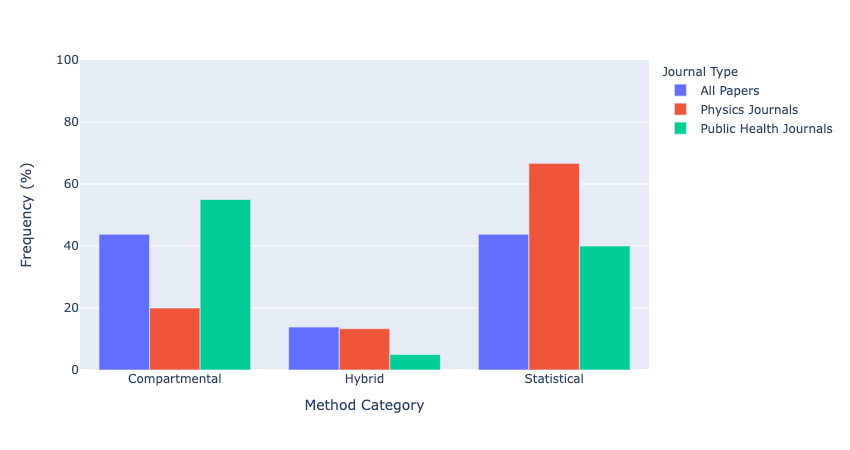

In [16]:
fig = px.bar(
    results_methods_small,
    x="value",
    y="pct",
    color="journal_type",
    range_y=(0,100),
    labels={"pct": "Frequency (%)", "value": "Method Category", "journal_type": "Journal Type"},
    barmode="group",
)
fig.write_image(f"../figures/compare-methods-01.png", width=800, height=450, scale=3)
fig.write_image(f"../figures/compare-methods-01.svg", width=800, height=450)
fig.show()

In [17]:
results_methods = results["main"]["method_cats"].copy()
results_methods["journal_type"] = result_type_names["main"]
for s in ["medicine", "epidemiology", "public-health", "mathematics", "engineering", "physics"]:
    df = results[s]["method_cats"].copy()
    df["journal_type"] = result_type_names[s]
    results_methods = results_methods.append(df)
results_methods.pct = results_methods.pct * 100
results_methods

value  occurances        pct            journal_type
1  Compartmental          60  43.795620              All Papers
2         Hybrid          19  13.868613              All Papers
0    Statistical          60  43.795620              All Papers
0  Compartmental           6  54.545455       Medicine Journals
2         Hybrid           2  18.181818       Medicine Journals
1    Statistical           3  27.272727       Medicine Journals
0  Compartmental          10  76.923077   Epidemiology Journals
2         Hybrid           1   7.692308   Epidemiology Journals
1    Statistical           2  15.384615   Epidemiology Journals
0  Compartmental          11  55.000000  Public Health Journals
2         Hybrid           1   5.000000  Public Health Journals
1    Statistical           8  40.000000  Public Health Journals
1  Compartmental          17  36.170213    Mathematics Journals
2         Hybrid           4   8.510638    Mathematics Journals
0    Statistical          26  55.319149    Mathematics Journals
0  Compartmental          14  53.846154    Engineering Journals
2         Hybrid           5  19.230769    Engineering Journals
1    Statistical           8  30.769231    Engineering Journals
1  Compartmental           6  20.000000        Physics Journals
2         Hybrid           4  13.333333        Physics Journals
0    Statistical          20  66.666667        Physics Journals

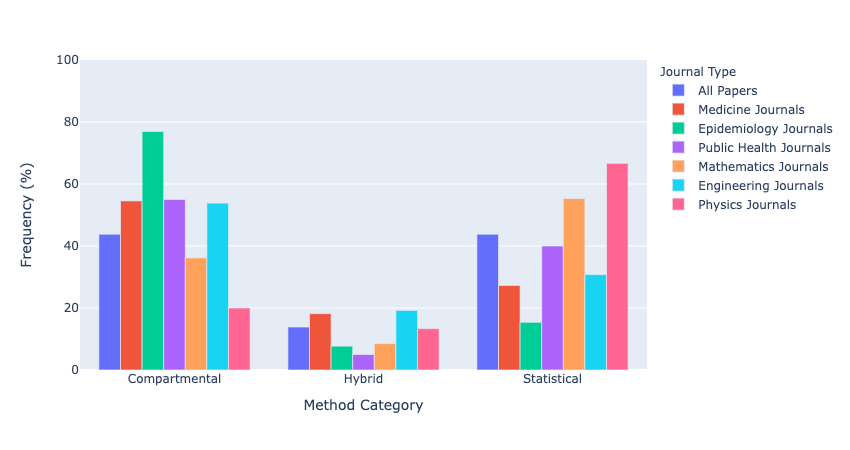

In [18]:
fig = px.bar(
    results_methods,
    x="value",
    y="pct",
    color="journal_type",
    range_y=(0,100),
    labels={"pct": "Frequency (%)", "value": "Method Category", "journal_type": "Journal Type"},
    barmode="group",
)
fig.write_image(f"../figures/compare-methods-02.png", width=900, height=450, scale=3)
fig.write_image(f"../figures/compare-methods-02.svg", width=900, height=450)
fig.show()